<a href="https://colab.research.google.com/github/asimoya99/Computer-Vision/blob/master/Classify_Newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# multiclass classification example
from  tensorflow.keras.datasets import reuters


In [0]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words= 10000)

In [0]:
# encoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])


In [0]:
import numpy as np
# enocode the data
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]  = 1
  return results

In [0]:
# vectorize the training and the test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# one hot encoding for labels
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [0]:
# vectorized training labels and test labels
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [56]:
'''# using the built in to_categorical for one_hot_encoding

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)'''

'# using the built in to_categorical for one_hot_encoding\n\nfrom keras.utils.np_utils import to_categorical\none_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)'

In [0]:
# model definition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape= (10000,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(46, activation='softmax'))


In [0]:
# compile the model
 model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
 

In [0]:
# setting aside a validation set 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [61]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 2.5660 - accuracy: 0.5644 - val_loss: 1.7291 - val_accuracy: 0.6740
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3878 - accuracy: 0.7161 - val_loss: 1.3314 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0419 - accuracy: 0.7737 - val_loss: 1.1607 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8204 - accuracy: 0.8206 - val_loss: 1.0575 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6459 - accuracy: 0.8633 - val_loss: 0.9857 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5166 - accuracy: 0.8931 - val_loss: 0.9262 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4157 - accuracy: 0.9177 - val_loss: 0.9081 - val_accuracy: 0.8140
Epoch 8/20
16

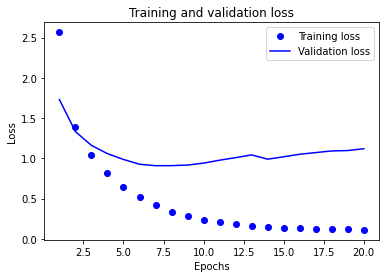

In [62]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
# retrain the model from scratch 
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,))) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
metrics=['accuracy']) 
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,))) 
model.add(Dense(4, activation='relu')) 
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
metrics=['accuracy']) 
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
